In [1]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u
from astropy.io import fits
from astropy.visualization import hist

from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
#%matplotlib widget

In [2]:
#rootdir = Path("/mnt/e/wfsdat")
#rootdir = Path("./data")
rootdir = Path("/Volumes/Elements_18TB/wfsdat")
# use find to make this csv list
with open(rootdir / "reanalyze_csvs_2024q3.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [3]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,13008,1,binospec,13008
f5,105,1,f5,105
mmirs,1872,1,mmirs,1872


In [4]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
#fixed = fixed[fixed['time'] < "2020-12-31"]

In [5]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2024-07-05T07:08:44.336000,binospec,wfs_ff_cal_img_2024.07.05T070844.336.fits,45.0,1.4951,-104.021191,41.978941,19.0,19.50,19.1,...,116.60,17.320,0.000,286.002782,252.503275,1.270443,1.617176,7.768283,2928.068094,1350.353773
1,2024-07-05T07:10:23.470000,binospec,wfs_ff_cal_img_2024.07.05T071023.470.fits,45.0,1.5047,-103.736749,41.649684,19.0,19.50,19.1,...,21.48,-10.533,0.447,285.506176,249.757916,1.221830,1.561280,7.553311,969.640444,1188.814801
2,2024-07-05T07:11:32.121000,binospec,wfs_ff_cal_img_2024.07.05T071132.121.fits,40.0,1.5121,-103.524661,41.402095,19.0,19.40,19.2,...,20.42,-8.053,0.382,289.331885,247.014314,1.234630,1.582287,7.634218,771.932135,1201.475321
3,2024-07-05T07:12:15.280000,binospec,wfs_ff_cal_img_2024.07.05T071215.280.fits,40.0,1.5164,-103.401279,41.257309,19.0,19.40,19.1,...,19.57,-4.949,1.657,285.758968,249.754229,1.185041,1.521323,7.399025,721.433207,1123.422080
4,2024-07-05T07:12:58.497000,binospec,wfs_ff_cal_img_2024.07.05T071258.497.fits,40.0,1.5208,-103.278445,41.112255,19.0,19.30,19.2,...,19.73,-5.931,1.374,287.991803,250.005347,1.252500,1.610724,7.743517,717.259927,1174.813254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2024-09-30T12:05:01.391000,binospec,wfs_ff_cal_img_2024.09.30T120501.391.fits,60.0,1.4884,196.115329,42.212100,17.0,16.87,17.3,...,-0.00,-0.000,-0.406,285.490018,246.009046,1.410746,1.790939,8.428046,201.787013,1087.068376
833,2024-09-30T12:06:04.549000,binospec,wfs_ff_cal_img_2024.09.30T120604.549.fits,60.0,1.4901,196.439694,42.152362,17.0,16.84,17.3,...,0.00,-0.000,-0.705,295.011461,246.992551,1.425880,1.811391,8.505366,192.770354,1091.617190
834,2024-09-30T12:07:07.726000,binospec,wfs_ff_cal_img_2024.09.30T120707.726.fits,60.0,1.4919,196.768233,42.090371,17.0,16.74,17.3,...,2.66,-0.000,-0.000,285.508007,246.989154,1.277702,1.624327,7.793539,202.945728,1150.410457
835,2024-09-30T12:08:10.951000,binospec,wfs_ff_cal_img_2024.09.30T120810.951.fits,60.0,1.4937,197.091761,42.028208,17.0,16.88,17.2,...,7.35,-1.059,-0.868,287.492644,247.008819,1.302670,1.657267,7.919654,334.043148,1190.752511


In [6]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

<Figure size 800x500 with 0 Axes>

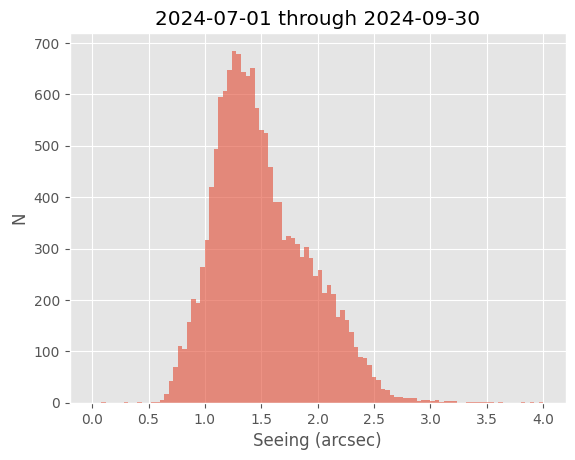

In [7]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2024-07-01 through 2024-09-30")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [8]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.24998513283581547 -0.14024364476971332 1.602321438316872


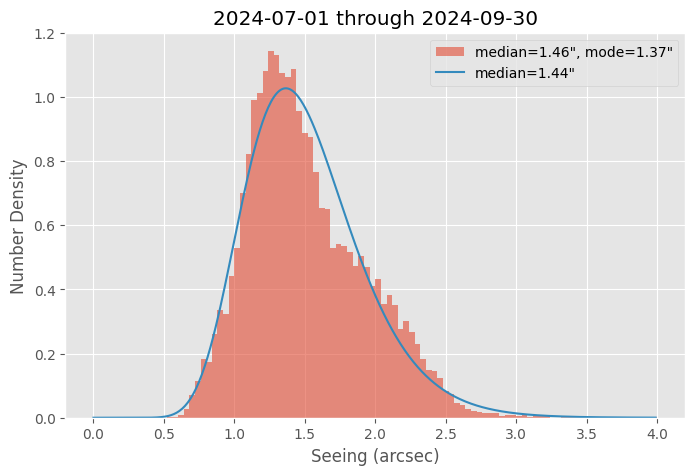

In [9]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("2024-07-01 through 2024-09-30")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2024_q3.png")
plt.show()

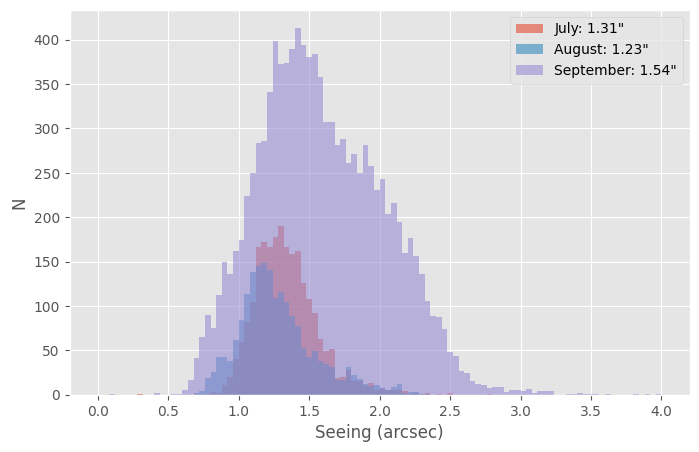

In [10]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
months = {}
legends = []
months['July'] = fixed.loc['2024-07']
months['August'] = fixed.loc['2024-08']
months['September'] = fixed.loc['2024-09']

for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2024_q3_monthly.png")
plt.show()

In [11]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

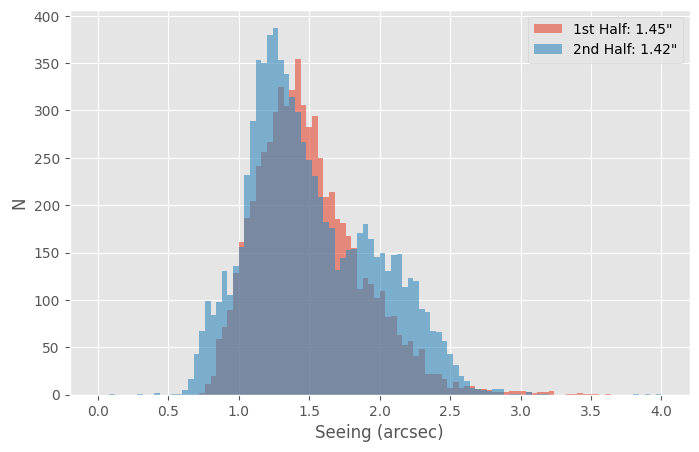

In [12]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2024_q3_1st2nd.png")
plt.show()

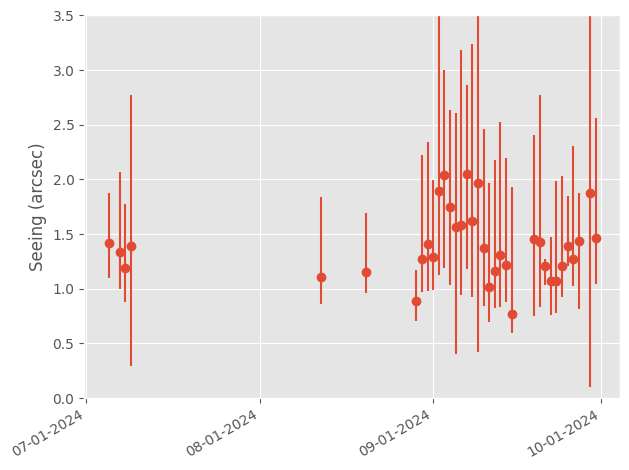

In [13]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2024_q3_nightly.png")
plt.show()

In [14]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

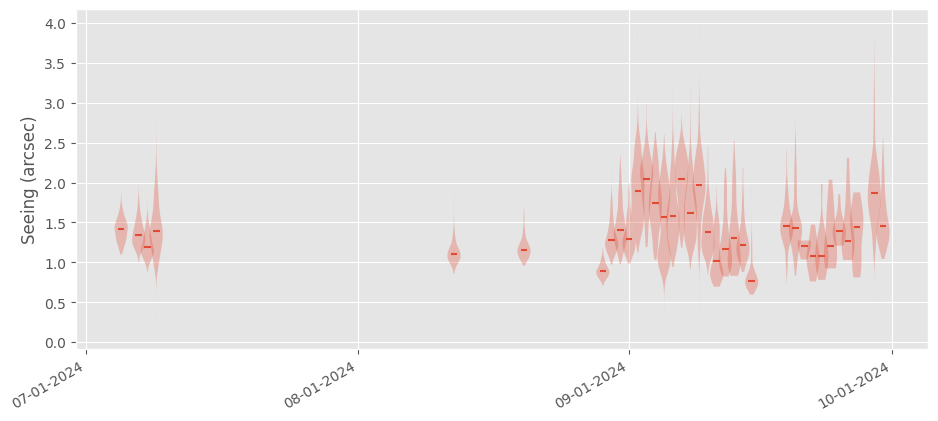

In [15]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2024_q3_violin.png")
    plt.show()

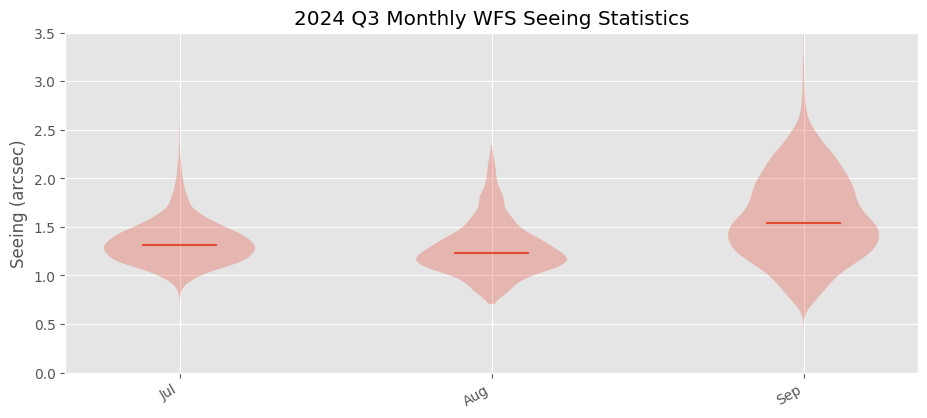

In [16]:
months = sorted(list(set(daily.index.strftime('%Y-%m'))))
mdata = [np.array(fixed.loc[month]['seeing']) for month in months]
clean_data = {}
for d, arr in zip(months, mdata):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=100, widths=15,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2024_q3_violin_monthly.png")
    plt.title("2024 Q3 Monthly WFS Seeing Statistics")
    plt.show()

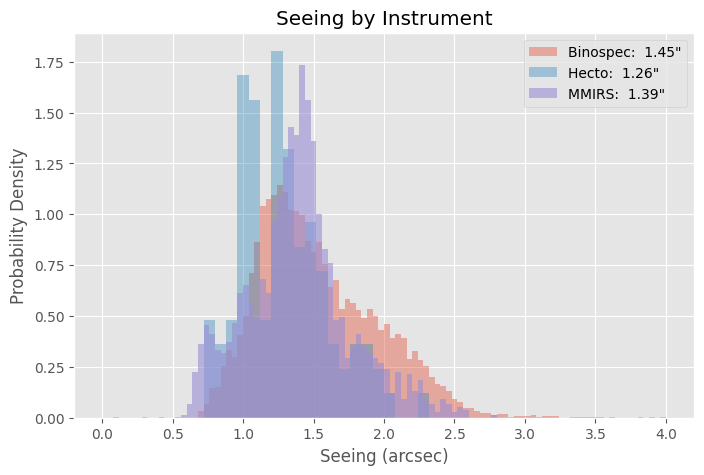

In [17]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    medm = np.median(fixed['seeing'][fixed['wfs'] == 'mmirs'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], density=True, bins=100, range=(0.0, 4.), alpha=0.4, label=f"Binospec: {medb: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], density=True, bins=50, range=(0.0, 4.), alpha=0.4, label=f"Hecto: {medf: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'mmirs'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"MMIRS: {medm: .2f}\"")
    plt.legend()
    plt.title("Seeing by Instrument")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Probability Density")
plt.savefig("per_instrument_2024_q3.png")
plt.show()

In [18]:
from minicyclop.io import read_seeing_data

In [19]:
cyclop = read_seeing_data(Path.home() / "MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt")

In [20]:
cyclop

,UT,flux,seeing,r0,isot,epoch_ms
ut,,,,,,
2022-06-08 03:32:32,6/8/2022 3:32:32 AM,2733.7,0.84,135.8,2022-06-08T03:32:32.968,1654659152968
2022-06-08 03:33:27,6/8/2022 3:33:27 AM,2755.7,0.84,134.4,2022-06-08T03:33:27.409,1654659207408
2022-06-08 03:34:23,6/8/2022 3:34:23 AM,2801.6,2.38,47.7,2022-06-08T03:34:23.655,1654659263655
2022-06-08 03:35:16,6/8/2022 3:35:16 AM,2853.2,1.01,112.3,2022-06-08T03:35:16.325,1654659316324
2022-06-08 03:36:00,6/8/2022 3:36:00 AM,2739.0,1.03,110.7,2022-06-08T03:36:00.691,1654659360691
...,...,...,...,...,...,...
2024-11-01 13:01:06,11/1/2024 1:01:06 PM,601.8,0.99,114.0,2024-11-01T13:01:06.747,1730466066746
2024-11-01 13:08:57,11/1/2024 1:08:57 PM,1093.3,0.95,119.4,2024-11-01T13:08:57.981,1730466537981
2024-11-01 13:09:45,11/1/2024 1:09:45 PM,1346.9,1.08,104.7,2024-11-01T13:09:45.847,1730466585846


In [21]:
cyclop_q1 = cyclop[(cyclop.index >= '2024-07-01') & (cyclop.index < '2024-10-01')]

0.5298617264598403 0.49189408708391874 0.6342985978178133


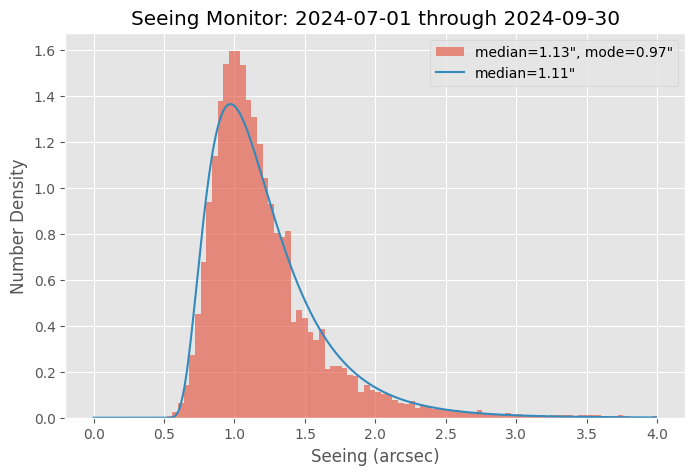

In [22]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(cyclop_q1['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(cyclop_q1['seeing'])
fit_median = exp_mu + loc

# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(cyclop_q1['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("Seeing Monitor: 2024-07-01 through 2024-09-30")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2024_q3_cyclop_hist.png")
plt.show()

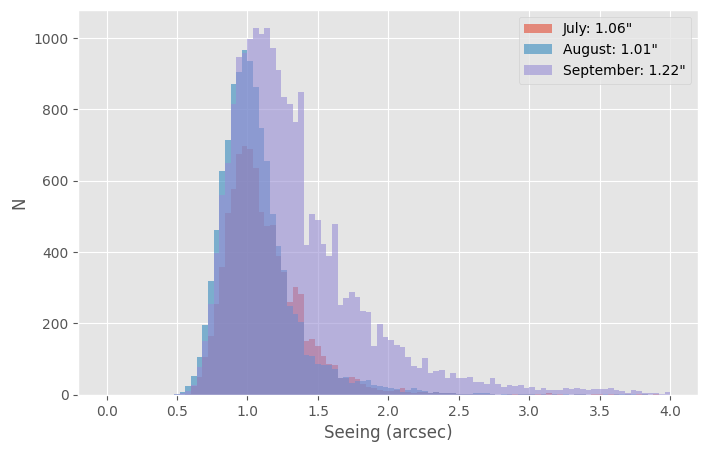

In [23]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
cyc_months = {}
legends = []
cyc_months['July'] = cyclop_q1.loc['2024-07']
cyc_months['August'] = cyclop_q1.loc['2024-08']
cyc_months['September'] = cyclop_q1.loc['2024-09']

for m in cyc_months.keys():
    plt.hist(cyc_months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(cyc_months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2024_q3_cyclop_monthly.png")
plt.show()

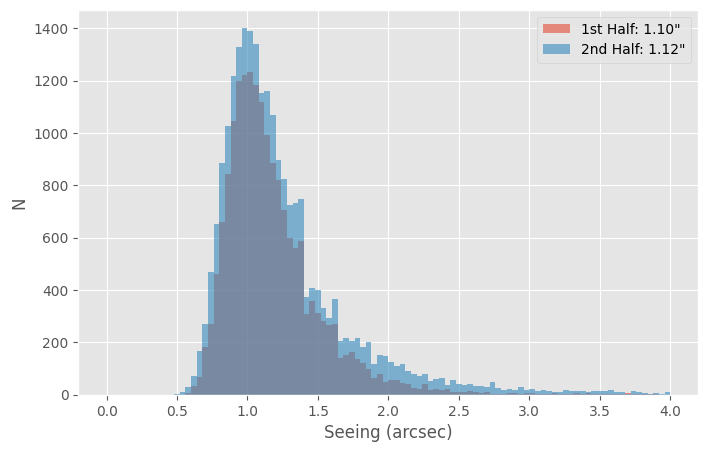

In [24]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = cyclop_q1.between_time(start_time='00:00', end_time='07:00')
second_half = cyclop_q1.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2024_q3_cyclop_1st2nd.png")
plt.show()

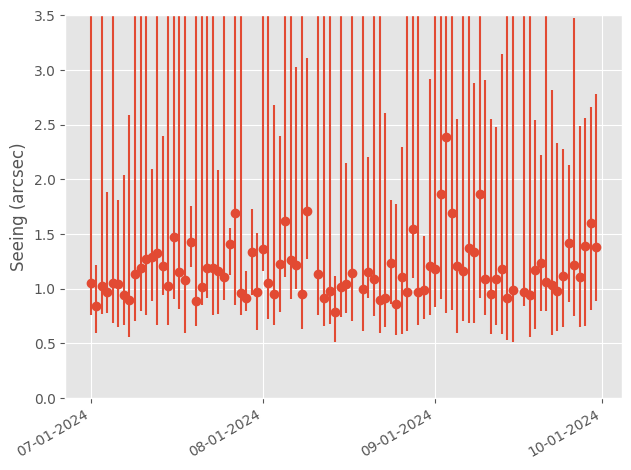

In [25]:
# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = cyclop_q1.seeing.resample('D').median()
daily['max'] = cyclop_q1.seeing.resample('D').max()
daily['min'] = cyclop_q1.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2024_q3_cyclop_plot_monthly.png")
plt.show()

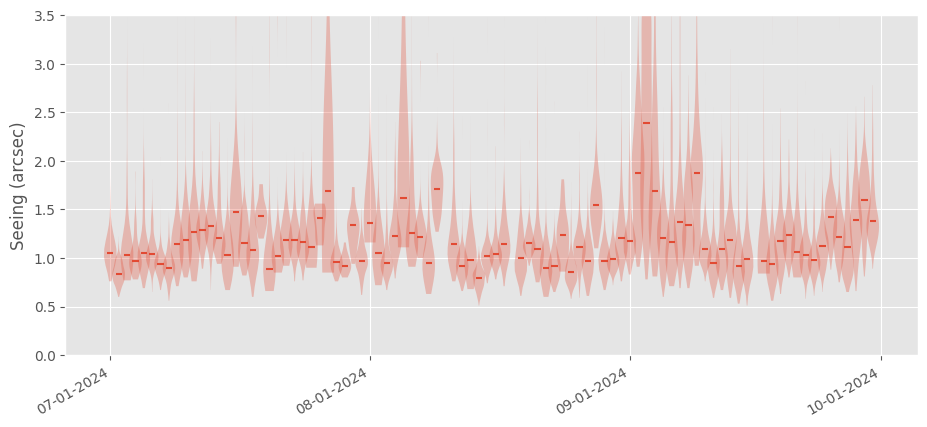

In [26]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(cyclop_q1.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2024_q3_cyclop_violin.png")
    plt.show()

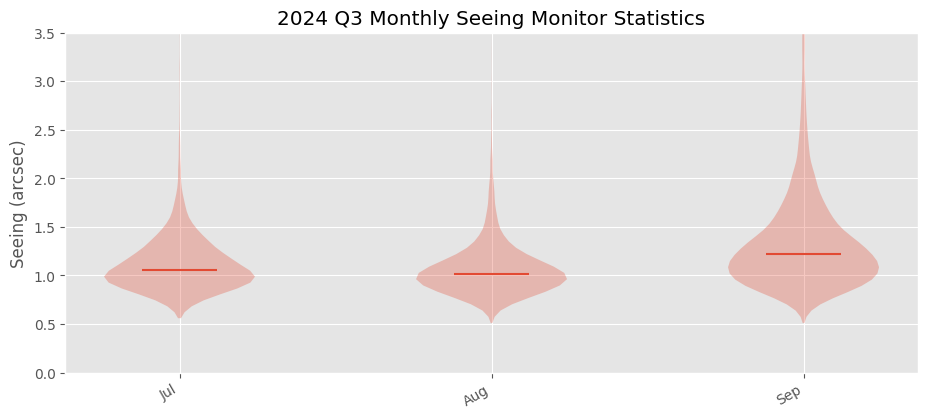

In [27]:
months = sorted(list(set(daily.index.strftime('%Y-%m'))))
mdata = [np.array(cyclop_q1.loc[month]['seeing']) for month in months]
clean_data = {}
for d, arr in zip(months, mdata):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=100, widths=15,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2024_q3_cyclop_violin_monthly.png")
    plt.title("2024 Q3 Monthly Seeing Monitor Statistics")
    plt.show()

In [28]:
bino = fixed[fixed['wfs'] == 'binospec']
hecto = fixed[fixed['wfs'] == 'f5']
mmirs = fixed[fixed['wfs'] == 'mmirs']


In [29]:
bino_dates = sorted(list(set(bino.index.strftime('%Y-%m-%d'))))
hecto_dates = sorted(list(set(hecto.index.strftime('%Y-%m-%d'))))
mmirs_dates = sorted(list(set(mmirs.index.strftime('%Y-%m-%d'))))


In [30]:
cyc_bino = np.hstack([np.array(cyclop_q1.loc[date]['seeing']) for date in bino_dates])
cyc_hecto = np.hstack([np.array(cyclop_q1.loc[date]['seeing']) for date in hecto_dates])
cyc_mmirs = np.hstack([np.array(cyclop_q1.loc[date]['seeing']) for date in mmirs_dates])


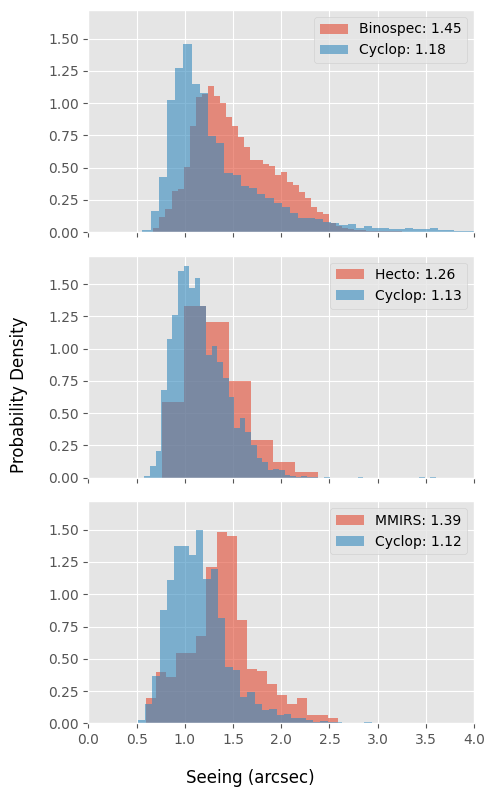

In [35]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(3, 1, figsize=(5, 8), sharex=True, sharey=True)
    ax = ax.flat
    fig.subplots_adjust(hspace=0)

    hist(bino['seeing'], bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_bino, bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    ax[0].legend([f"Binospec: {np.median(bino['seeing']):.2f}", f"Cyclop: {np.median(cyc_bino):.2f}"])
    ax[0].set_xlim(0, 4)

    hist(hecto['seeing'], bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_hecto, bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    ax[1].legend([f"Hecto: {np.median(hecto['seeing']):.2f}", f"Cyclop: {np.median(cyc_hecto):.2f}"])
    ax[1].set_xlim(0, 4)

    hist(mmirs['seeing'], bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_mmirs, bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    ax[2].legend([f"MMIRS: {np.median(mmirs['seeing']):.2f}", f"Cyclop: {np.median(cyc_mmirs):.2f}"])
    ax[2].set_xlim(0, 4)


    fig.supxlabel("Seeing (arcsec)")
    fig.supylabel("Probability Density")

    plt.tight_layout()
    plt.savefig("2024_q3_cyclop_vs_inst.png")
    plt.show()

In [37]:
hdimm = pd.read_csv("hdimm_clean.csv")
hdimm = hdimm.set_index(pd.DatetimeIndex(hdimm['time'], name='ut'))
hdimm

,time,target,seeing,seeing_1,seeing_2,seeing_3,airmass,azimuth,exptime
ut,,,,,,,,,
2024-05-25 06:46:10.756,2024-05-25T06:46:10.756,Vega,0.831,0.808,0.857,0.829,1.369,65.3,0.002
2024-05-25 06:57:29.485,2024-05-25T06:57:29.485,Vega,1.021,1.000,1.027,1.037,1.369,65.3,0.002
2024-05-25 06:58:55.943,2024-05-25T06:58:55.943,Vega,0.966,0.932,1.013,0.954,1.369,65.3,0.002
2024-05-25 07:00:38.899,2024-05-25T07:00:38.899,Vega,1.065,1.057,1.086,1.051,1.369,65.3,0.002
2024-05-25 07:03:03.848,2024-05-25T07:03:03.848,Vega,1.049,1.084,1.020,1.042,1.369,65.3,0.002
...,...,...,...,...,...,...,...,...,...
2024-10-28 12:34:04.994,2024-10-28T12:34:04.994,Capella,1.083,1.116,1.061,1.073,1.162,308.1,0.001
2024-10-28 12:35:02.588,2024-10-28T12:35:02.588,Capella,1.197,1.237,1.159,1.196,1.164,308.0,0.001
2024-10-28 12:35:56.274,2024-10-28T12:35:56.274,Capella,1.289,1.338,1.200,1.328,1.166,307.9,0.001


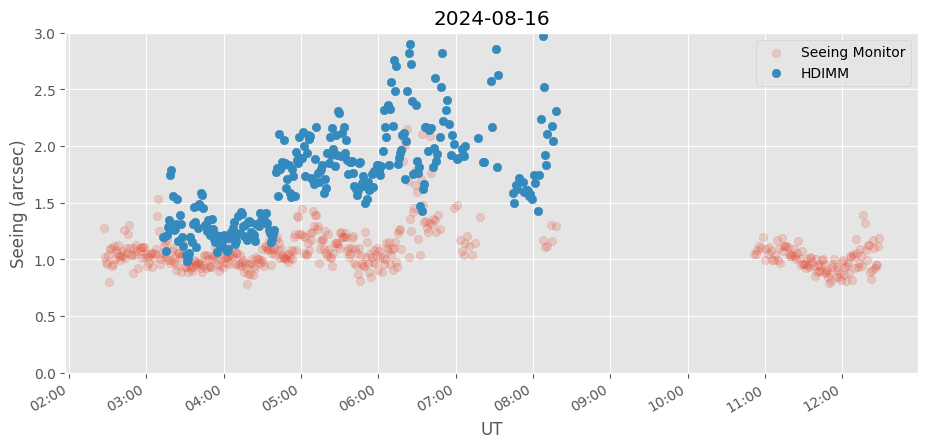

In [60]:
date = '2024-08-16'
seeing_mon = cyclop_q1.loc[date]
fig, ax = plt.subplots(figsize=(11,5))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
fig.autofmt_xdate()
plt.scatter(seeing_mon.index, seeing_mon['seeing'], alpha=0.2, label="Seeing Monitor")
plt.scatter(hdimm.loc[date].index, hdimm.loc[date]['seeing'], label="HDIMM")
plt.ylabel("Seeing (arcsec)")
plt.title(date)
plt.xlabel("UT")
plt.ylim(0,3)
plt.legend()
plt.savefig("hdimm_cyclop_wfs_20240816.png")
plt.show()

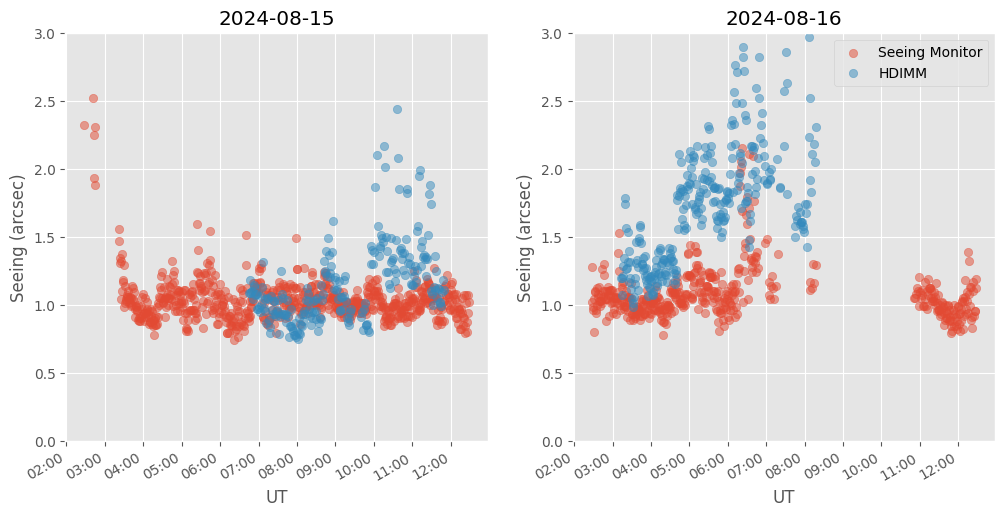

In [63]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)
    fig.autofmt_xdate()
    ax = ax.flat
    hdimm_dates = ['2024-08-15', '2024-08-16']
    for i, date in enumerate(hdimm_dates):
        seeing_mon = cyclop_q1.loc[date]
        seeing_hdimm = hdimm.loc[date]
        ax[i].set_ylabel("Seeing (arcsec)")
        ax[i].set_xlabel("UT")
        ax[i].xaxis.set_major_locator(mdates.HourLocator())
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax[i].scatter(seeing_mon.index, seeing_mon['seeing'], alpha=0.5, label="Seeing Monitor")
        ax[i].scatter(seeing_hdimm.index, seeing_hdimm['seeing'], alpha=0.5, label="HDIMM")
        ax[i].set_title(date)
        ax[i].set_ylim(0, 3)
    ax[-1].legend()
    plt.savefig("hdimm_cyclop_wfs_aug.png")
    plt.show()